Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "DanilPeg"

---

# Задача Коши для ОДУ

In [2]:
import math as m

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [17]:
%matplotlib inline
from matplotlib import patches as pts

In [5]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

In [6]:
plt.rcParams['figure.figsize'] = [9, 7]

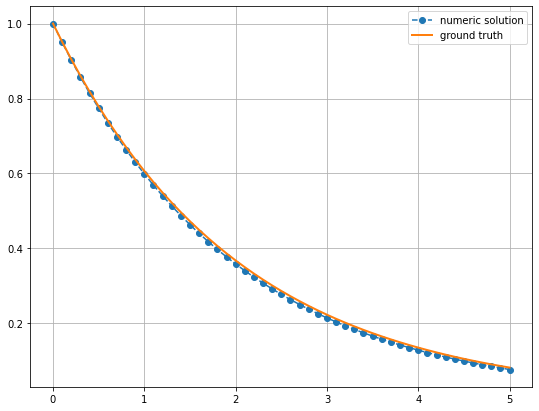

In [7]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Постройте решения как в ячейке выше для различных $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$.

(1 point)

[0.0, 0.22959219532269518, 0.4591865421774307, 0.6887851921164092, 0.9183902967321578, 1.1480040076776912, 1.3776284766866749, 1.6072658555935895, 1.8369182963538946, 2.0665879510641973, 2.2962769719824183, 2.5259875115479598, 2.7557217224018777, 2.9854817574070562, 3.215269769668377, 3.445087912552902, 3.674938339710049, 3.904823205091775, 4.134744662972762, 4.364704867970604, 4.594705975065997, 4.824750139622936, 5.054839517408911, 5.284976264615111, 5.515162537876627, 5.745400494292666, 5.975692291446761, 6.206040087426993, 6.4364460408462145, 6.666912310862275, 6.89744105719826, 7.1280344401627245, 7.358694620669942, 7.589423760260152, 7.820224021119815, 8.051097566101877, 8.28204655874604, 8.513073163299032, 8.744179544734884, 8.975367868775235, 9.206640301909612, 9.437999011415734, 9.669446165379826, 9.900983932716938, 10.132614483191267, 10.364339987436486, 10.596162616976095, 10.828084544243762, 11.06010794260368, 11.29223498637095]


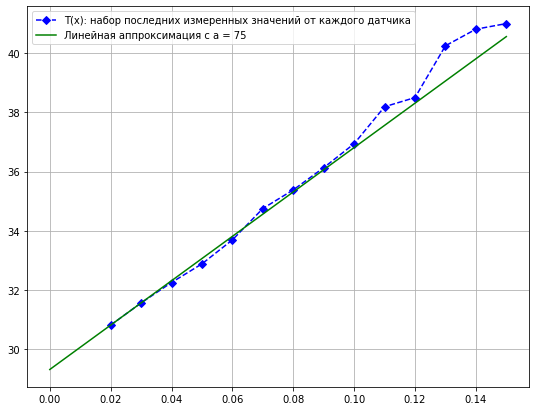

In [8]:
# YOUR CODE HERE
x_a, a = np.linspace(0,0.15), 194
y_a = [(i * 75 + 29.31) for i in x_a]
y_f =[75*m.sinh(i) for i in x_a]
x, y = np.arange(0.02,0.1599,0.01), np.array([30.81, 31.56,32.25,32.88,33.69,34.75,35.38,36.13,36.94,38.19,38.5,40.25,40.81,41])
plt.plot(x, y, 'bD--', label='T(x): набор последних измеренных значений от каждого датчика')
plt.plot(x_a, y_a, '-', label='Линейная аппроксимация с а = 75', color='green')

plt.legend(loc='best')
plt.grid(True)
print(y_f)

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя неявную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(1 point)

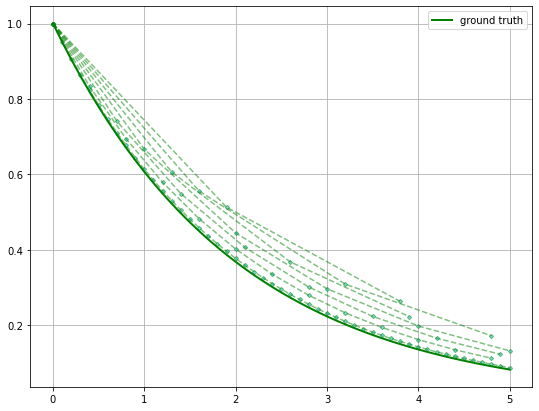

In [9]:
# YOUR CODE HERE
def implicit_euler(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - lam * dt)
    return tt, y
lam, dt = -0.5, 0.1
while dt < 2:
    tt, y = implicit_euler(lam, u0=1.0, T=5, dt = dt)
    plt.plot(tt, y, 'Dg--', mfc ='c', ms = 3, alpha = 0.5)
    dt += 0.3
tt, y = implicit_euler(lam, u0=1.0, T=5, dt = 0.1)
plt.plot(tt, np.exp(lam*tt), 'g-', lw=2, label='ground truth') #самые большие отклонения кривых - при больших dt
plt.legend()
plt.grid(True)

Неявная схема Эйлера справляется точнее, при больших шагах dt.

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [10]:
# YOUR CODE HERE
def euler_solve2(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0] = u0
    for i in range(num_steps):
        y[i+1][0], y[i+1][1] = y[i][0] + A[0][0]*y[i][0]*dt + A[0][1]*y[i][1]*dt, y[i][1] + A[1][0]*y[i][0]*dt + A[1][1]*y[i][1]*dt
    return tt, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(1 point)

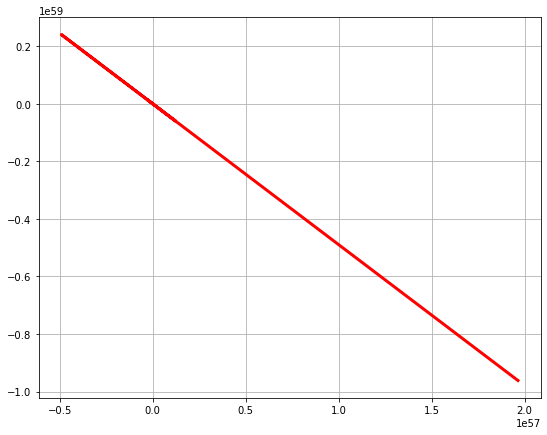

In [11]:
# YOUR CODE HERE
A, dt = [[-10, 10],[32, -499]], 0.01
tt, y = euler_solve2(A, u0=[1, 0], T=1, dt = dt)
y1, y2 = [],[]
for i in y:
    y1.append(i[0])
    y2.append(i[1])
plt.plot(y1, y2, 'r-', lw=3)
plt.grid(True)
lam = np.linalg.eigvals(A).tolist()

In [12]:
print(abs(lam[0] * 0.01 + 1) < 1  and abs(lam[1] * 0.01 + 1) < 1)
#система не является устойчивой
lam[0], lam[1] = abs(lam[0]), abs(lam[1])
print(max(lam[0],lam[1])/min(lam[0],lam[1]))#полученное значение >> 1 - система жесткая

False
53.45902427704808


### Тест II.2

Реализуйте \textit{неявную} схему Эйлера для системы уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(1 point)

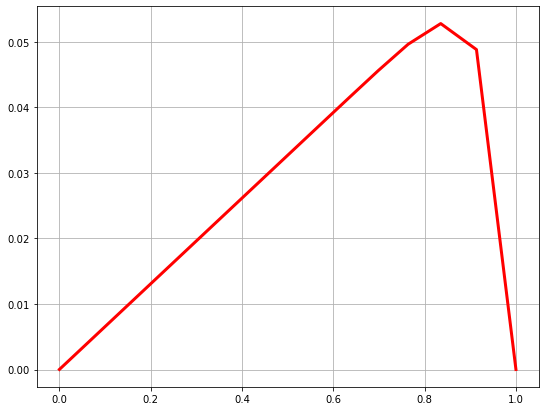

In [13]:
# YOUR CODE HERE
def implicit_euler2(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0] = u0
    for i in range(num_steps):
        a, b = [[1 - dt * A[0][0], -dt * A[0][1]], [-dt * A[1][0], 1 - dt * A[1][1]]], [y[i][0], y[i][1]]
        y[i+1][0], y[i+1][1] = np.linalg.solve(a,b)
    return tt, y
A, dt = [[-10, 10],[32, -499]], 0.01
tt, y =  implicit_euler2(A, u0=[1, 0], T=1, dt = dt)
y1, y2 = [],[]
for i in y:
    y1.append(i[0])
    y2.append(i[1])
plt.plot(y1, y2, 'r-', lw=3)
plt.grid(True)

# III. Модель Ланкастера

Рассмотрим модель Ланкастера: две армии, численность которых $x_1(t)$
и $x_2(t)$ соответственно, истребляют друг друга:

$$
\begin{cases}
\frac{d\,x_1}{dt} = - c_2 x_2,\\
\frac{d\,x_2}{dt} = - c_1 x_1
\end{cases}
$$

Война заканчивается в момент времени $T$, если численность какой-то из армий становится равна нулю $x_i(T)=0$ .


Для удоства будем исчилять время в $1/c_1$, тогда далее везде считаем $c_1=1, c_2=c$.

$$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}= 
\begin{pmatrix}
0& -c\\
-1& 0
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$
Можно явно выписать решение, найдя характеристические числа и собственные вектора
$$
\mathbf{x} = \sum_\pm C_{\pm}\mathbf{e_\pm} e^{\lambda_{\pm}t}, \; \lambda_{\pm} = \pm \sqrt{c}, \mathbf{e}_{\pm} = (\mp \sqrt{c}, 1)
$$

### Тест III.1 
Однако, если нас интересуют фазовые траектории(например кто победит), достаточно заметить, что у этой системы есть первый интеграл движения $I(x,y)=const$ (она Гамильтонова).

Найдите его, какая начальная численность первой армии $x_1(0)$ необходима для её победы? $x_{1min}(c, x_2(0))$

Выпишем явно решения системы:
$$x_{1} = -C_{1}\sqrt{c}e^{t\sqrt{c}} + C_{2}\sqrt{c}e^{-t\sqrt{c}}$$
$$x_{2} = C_{1}e^{t\sqrt{c}} + C_{2}e^{-t\sqrt{c}}$$
Домножим второе выражение на $\sqrt{c}$ и возведем оба выражения в квадрат:
$$x_{1}^{2} = C_{1}^{2}ce^{2t\sqrt{c}} + C_{2}^{2}ce^{-2t\sqrt{c}}-2C_{1}C_{2}c$$
$$x_{2}^{2}c = cC_{1}^{2}e^{2t\sqrt{c}} + cC_{2}^{2}e^{-2t\sqrt{c}} + 2cC_{1}C_{2}$$
Если вычесть из второго уравнения первое получим интеграл движения:
$$x_{2}^{2}c-x_{1}^{2} = 4cC_{1}C_{2}$$
Константы можно найти из начальных условий, при $t = 0$, тогда приняв $x_{1}(0) = x_{0}, x_{2}(0) = y_{0}$, получим:
$$x_{2}^{2}c-x_{1}^{2} = y_{0}^{2}c-x_{0}^{2}$$
Первая армия победит при условии:
$$x_{0} = y_{0}\sqrt{c}$$

### Тест III.2

Поробуем численно решить задачу для $c=2, x_2(0)=1$ при трёх начальных $x_1(0) = x_{1min}(c=2,x_2(0)=1)\times[1+10^{-2}, 1+ 10^{-1}, 2]$. 

Подправьте явную или неявную схему Эйлера так, чтобы она интегрировала до момента победы.
Реализуйте схему Рунге - Кутта второго порядка с тем же требованием.


**Постройте в двойном логарифмическом масштабе отклонение $I(T)$ от истинного значения
$\delta I = |I(x(T),y(T)) - I(x_1(0),x_2(0)|$ , в зависимости от шага интегрирования $\tau$** проинтегрировав 
* Методом Эйлера для трёх указнных $x_1(0)$ и различных $\tau$
* Методом Рунге - Кутта для трёх указанных $x_1(0)$ и различных $\tau$

(Должно быть 6 линий на графике - двумя методами каждую из $x_1(0)$)

(Используйте сплошные линии для Эйлера и пунктирные для РК, цветом различайте начальные $x_1(0)$)

(Шаги интегрирования $\tau$ удобно уменьшать как $2^{-N}$ или сгенерировать как `np.logspace` )

*Как полученные кривые соотносятся с теоретическим порядком аппроксимации схем?*


(4 point)

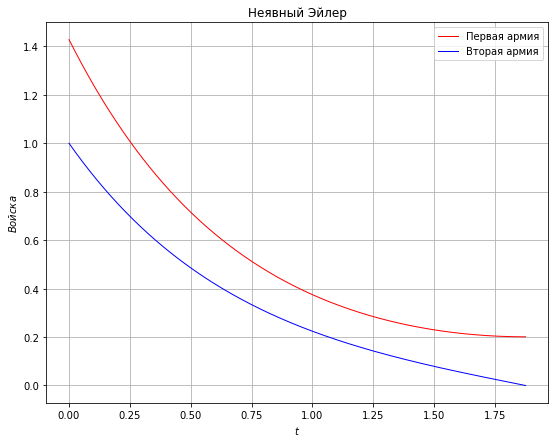

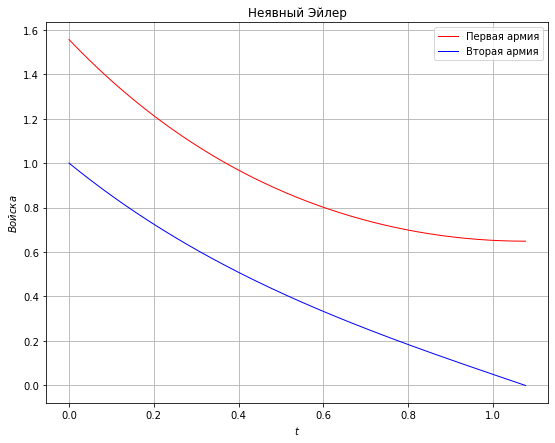

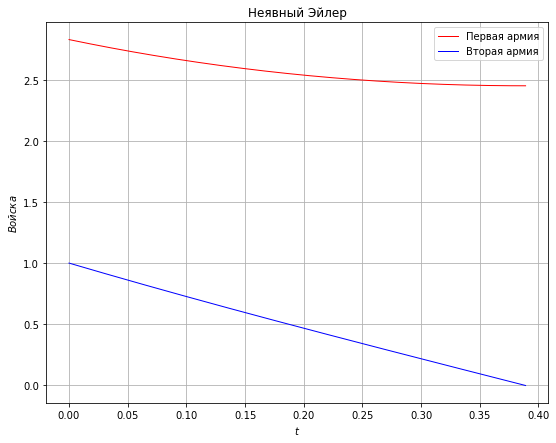

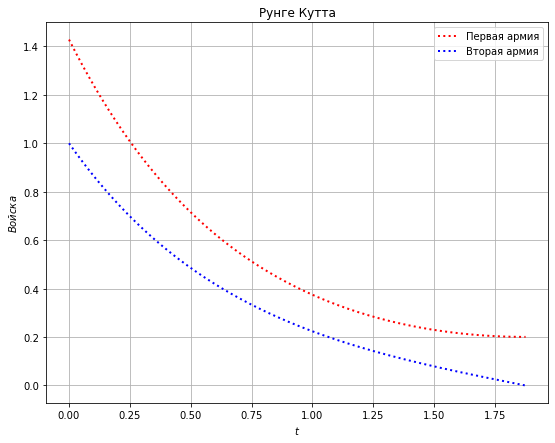

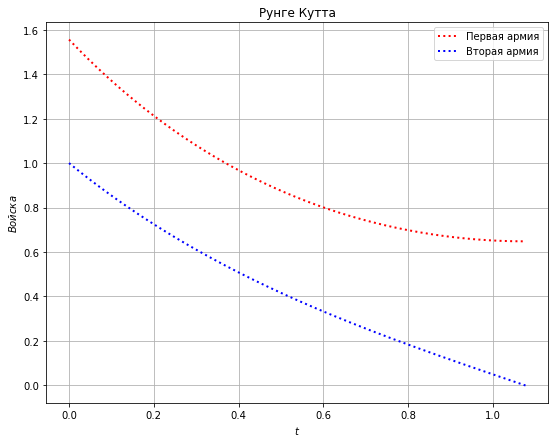

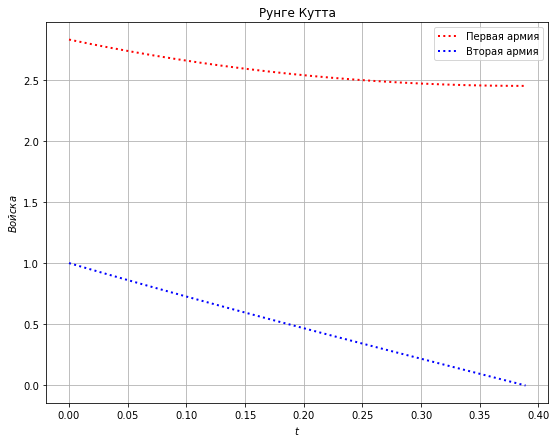

In [14]:
# YOUR CODE HERE
dt = 0.001
band =[[(1 + 10 ** (-2)) * np.sqrt(2),1],[(1 + 10 **(-1)) * np.sqrt(2), 1],[np.sqrt(2) * 2, 1]]
A = [[0, -2],[-1, 0]]
def implicit_euler_lankaster(A, u0, dt):
    y, i = [], 0
    y.append(u0)
    while True:
        a, b = [[1 - dt * A[0][0], -dt * A[0][1]], [-dt * A[1][0], 1 - dt * A[1][1]]], [y[i][0], y[i][1]]
        y1, y2 = np.linalg.solve(a,b)
        y.append([y1, y2])
        if y1 <= 0 or y2 <= 0:
            break
        i += 1
    tt = np.arange(i + 2) * dt
    return tt, y
for u0 in band:
    tt, y = implicit_euler_lankaster(A, u0 = u0, dt = dt)
    y1, y2 = [],[]
    for i in y:
        y1.append(i[0])
        y2.append(i[1])
    plt.title("Неявный Эйлер")
    plt.ylabel("$Войска$")
    plt.xlabel("$t$")
    plt.plot(tt, y1, 'r-', lw=1, label="Первая армия")
    plt.plot(tt, y2, 'b-', lw=1, label="Вторая армия")
    plt.grid(True)
    plt.legend()
    plt.show()
    

def Runge_Kutta(A, u0, dt):
    y = []
    i = 0
    y.append(u0)
    while True:
        a, b = [[1 - dt * A[0][0], -dt * A[0][1]], [-dt * A[1][0], 1 - dt * A[1][1]]], [y[i][0], y[i][1]]
        y1, y2 = np.linalg.solve(a,b)
        y11 = y[i][1] + (A[1][0] * y[i][0] + A[1][1] * y[i][1] + A[1][0] * y1 + A[1][1] * y2) * (dt * 0.5)
        y22 = y[i][0] + (A[0][0] * y[i][0] + A[0][1] * y[i][1] + A[0][0] * y1 + A[0][1] * y2) * (dt * 0.5)
        y.append([y22, y11])
        if y11 <= 0 or y22 <= 0: break
        i+=1
    tt = np.arange(i + 2) * dt
    return tt, y

for u0 in band:
    tt, y = Runge_Kutta(A, u0 = u0, dt = dt)
    y1, y2 = [],[]
    for i in y:
        y1.append(i[0])
        y2.append(i[1])
    plt.title("Рунге Кутта")
    plt.ylabel("$Войска$")
    plt.xlabel("$t$")
    plt.plot(tt, y1, 'r:', lw=2, label="Первая армия")
    plt.plot(tt, y2, 'b:', lw=2, label="Вторая армия")
    plt.grid(True)
    plt.legend()
    plt.show()

Вернёмся к аналитическому рассмотрению.
Найдите явно решение $\mathbf{x}(t)$ в зависимости от начальных $x_1(0), x_2(0)$, выразив через них $C_{\pm}$.
Получите формулу для времени окончания войны $T(x_1(0), x_2(0))$.
Постройте на одном холсте при $c=\frac{3}{2}$
* Несколько фазовых траекторий (линий $I(x_1,x_2) = const$ с различными константами)
* Несколько линий уровня $T(x_1(0), x_2(0))$ (ГМТ начальных данных, где время войны фиксированно)

Итоговый график должен быть информативным, не забудьте в частности указать чему равны $T$ на изолиниях (лучше подписать на самих линиях как в `plt.clabel(curves)`, а не в легенде)

Можете ли вы получить асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \epsilon, \epsilon\ll1$?

(3 point)

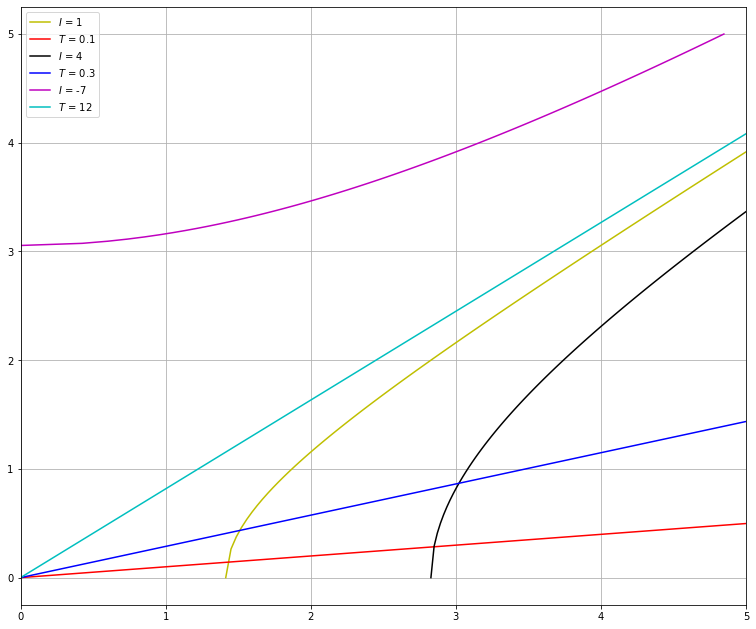

In [52]:
plt.figure(figsize=(13, 11))
c, fancy = 3/2, ['y', 'k', 'm', 'r', 'b', 'c', 'g']
I_begin = [1, 4, -7]
T_begin = [0.1, 0.3, 12]
for i in range(len(consts_I)):
  color, const, T = fancy[i], I_begin[i], T_begin[i]
  if const < 0:
    x2_= np.linspace(np.sqrt(-2 * const / c), 5, 100)
    x1 = np.sqrt(c * x2_ ** 2 + 2 * const)
    plt.plot(x1, x2_sym, color=color, label=f'$I$ = {const}')
  else:
    x1 = np.linspace(np.sqrt(2 * const), 5, 100)
    x2 =  np.sqrt((1/c) * (x1 ** 2 - 2 * const))
    plt.plot(x1, x2, color=color, label=f'$I$ = {const}')
  x10 = np.linspace(0, 5, 100)
  pc = np.e ** (2 * np.sqrt(c) * T)
  nc = (1/np.sqrt(c)) * ((pc - 1)/ (pc + 1))
  x20 = nc * x10 
  plt.plot(x10, x20, color=fancy[i + 3], label=f'$T$ = {T}')


plt.grid(True)
plt.legend(loc='best')
plt.xlim(0, 5)
plt.show()